# San Francisco Crime

## Leo CSV como RDD

In [1]:
dataframe = sqlContext.read.csv('data/sf.csv', header=True)

In [2]:
data = dataframe.rdd
data

MapPartitionsRDD[10] at javaToPython at NativeMethodAccessorImpl.java:0

## Primer registro de los datos

In [3]:
data.first()

Row(Dates=u'2015-05-13 23:53:00', Category=u'WARRANTS', Descript=u'WARRANT ARREST', DayOfWeek=u'Wednesday', PdDistrict=u'NORTHERN', Resolution=u'ARREST, BOOKED', Address=u'OAK ST / LAGUNA ST', X=u'-122.425891675136', Y=u'37.7745985956747')

## Cantidad de registros

In [4]:
data.count()

878049

## Categorías de crímenes

In [5]:
categories = data.map(lambda row: row.Category).distinct()

In [6]:
categories.collect()

[u'WEAPON LAWS',
 u'WARRANTS',
 u'LOITERING',
 u'EMBEZZLEMENT',
 u'DRIVING UNDER THE INFLUENCE',
 u'SEX OFFENSES FORCIBLE',
 u'ROBBERY',
 u'BURGLARY',
 u'PORNOGRAPHY/OBSCENE MAT',
 u'RECOVERED VEHICLE',
 u'BRIBERY',
 u'BAD CHECKS',
 u'SUSPICIOUS OCC',
 u'ARSON',
 u'PROSTITUTION',
 u'VANDALISM',
 u'LIQUOR LAWS',
 u'TREA',
 u'VEHICLE THEFT',
 u'ASSAULT',
 u'FAMILY OFFENSES',
 u'RUNAWAY',
 u'EXTORTION',
 u'KIDNAPPING',
 u'MISSING PERSON',
 u'DISORDERLY CONDUCT',
 u'SECONDARY CODES',
 u'STOLEN PROPERTY',
 u'FORGERY/COUNTERFEITING',
 u'TRESPASS',
 u'SUICIDE',
 u'DRUNKENNESS',
 u'FRAUD',
 u'NON-CRIMINAL',
 u'GAMBLING',
 u'DRUG/NARCOTIC',
 u'OTHER OFFENSES',
 u'SEX OFFENSES NON FORCIBLE',
 u'LARCENY/THEFT']

## Cantidad de categorías de crímenes

In [7]:
categories.count()

39

## Categorías de crímenes ordenadas alfabeticamente

In [8]:
categories.takeOrdered(40)

[u'ARSON',
 u'ASSAULT',
 u'BAD CHECKS',
 u'BRIBERY',
 u'BURGLARY',
 u'DISORDERLY CONDUCT',
 u'DRIVING UNDER THE INFLUENCE',
 u'DRUG/NARCOTIC',
 u'DRUNKENNESS',
 u'EMBEZZLEMENT',
 u'EXTORTION',
 u'FAMILY OFFENSES',
 u'FORGERY/COUNTERFEITING',
 u'FRAUD',
 u'GAMBLING',
 u'KIDNAPPING',
 u'LARCENY/THEFT',
 u'LIQUOR LAWS',
 u'LOITERING',
 u'MISSING PERSON',
 u'NON-CRIMINAL',
 u'OTHER OFFENSES',
 u'PORNOGRAPHY/OBSCENE MAT',
 u'PROSTITUTION',
 u'RECOVERED VEHICLE',
 u'ROBBERY',
 u'RUNAWAY',
 u'SECONDARY CODES',
 u'SEX OFFENSES FORCIBLE',
 u'SEX OFFENSES NON FORCIBLE',
 u'STOLEN PROPERTY',
 u'SUICIDE',
 u'SUSPICIOUS OCC',
 u'TREA',
 u'TRESPASS',
 u'VANDALISM',
 u'VEHICLE THEFT',
 u'WARRANTS',
 u'WEAPON LAWS']

## 10 delitos (categorías) más comunes

In [9]:
data.map(lambda row: (row.Category, 1))\
    .reduceByKey(lambda a, b: a+b)\
    .takeOrdered(10, key = lambda x: -x[1])

[(u'LARCENY/THEFT', 174900),
 (u'OTHER OFFENSES', 126182),
 (u'NON-CRIMINAL', 92304),
 (u'ASSAULT', 76876),
 (u'DRUG/NARCOTIC', 53971),
 (u'VEHICLE THEFT', 53781),
 (u'VANDALISM', 44725),
 (u'WARRANTS', 42214),
 (u'BURGLARY', 36755),
 (u'SUSPICIOUS OCC', 31414)]

## Día de la semana con más casos de 'Driving under the influence'

In [10]:
data.filter(lambda row: row.Category == 'DRIVING UNDER THE INFLUENCE')\
    .map(lambda row: (row.DayOfWeek, 1))\
    .reduceByKey(lambda a, b: a+b)\
    .takeOrdered(3, key = lambda x: -x[1])

[(u'Saturday', 457), (u'Sunday', 442), (u'Friday', 352)]

## Distritos

In [ ]:
districts = data.map(lambda row: row.PdDistrict).distinct()

In [ ]:
districts.takeOrdered(40)

## Los 3 distritos con mayor cantidad de crímenes

In [11]:
data.map(lambda row: (row.PdDistrict, 1))\
    .reduceByKey(lambda a, b: a+b)\
    .takeOrdered(3, key = lambda x: -x[1])

[(u'SOUTHERN', 157182), (u'MISSION', 119908), (u'NORTHERN', 105296)]

## Resolution

In [29]:
resolutions = data.map(lambda row: row.Resolution).distinct()

In [30]:
resolutions.takeOrdered(40)

[u'ARREST, BOOKED',
 u'ARREST, CITED',
 u'CLEARED-CONTACT JUVENILE FOR MORE INFO',
 u'COMPLAINANT REFUSES TO PROSECUTE',
 u'DISTRICT ATTORNEY REFUSES TO PROSECUTE',
 u'EXCEPTIONAL CLEARANCE',
 u'JUVENILE ADMONISHED',
 u'JUVENILE BOOKED',
 u'JUVENILE CITED',
 u'JUVENILE DIVERTED',
 u'LOCATED',
 u'NONE',
 u'NOT PROSECUTED',
 u'PROSECUTED BY OUTSIDE AGENCY',
 u'PROSECUTED FOR LESSER OFFENSE',
 u'PSYCHOPATHIC CASE',
 u'UNFOUNDED']

## Crímenes que tienen mayor porcentaje de resolución “Not Prosecuted”

In [12]:
data.map(lambda row: (row.Category, (int(row.Resolution == "NOT PROSECUTED"), 1)))\
    .reduceByKey(lambda a,b: (a[0]+b[0],a[1]+b[1]))\
    .takeOrdered(5, key = lambda x: -(x[1][0]*100/x[1][1]))

[(u'FORGERY/COUNTERFEITING', (698, 10609)),
 (u'FRAUD', (946, 16679)),
 (u'BAD CHECKS', (19, 406)),
 (u'GAMBLING', (4, 146)),
 (u'EMBEZZLEMENT', (21, 1166))]

## Delitos por día de la semana

In [13]:
day_of_week_crimes_rdd = data.map(lambda row: (row.DayOfWeek, 1))\
                             .reduceByKey(lambda a, b: a+b)

In [14]:
day_of_week_crimes = day_of_week_crimes_rdd.collect()
day_of_week_crimes

[(u'Sunday', 116707),
 (u'Tuesday', 124965),
 (u'Thursday', 125038),
 (u'Monday', 121584),
 (u'Friday', 133734),
 (u'Wednesday', 129211),
 (u'Saturday', 126810)]

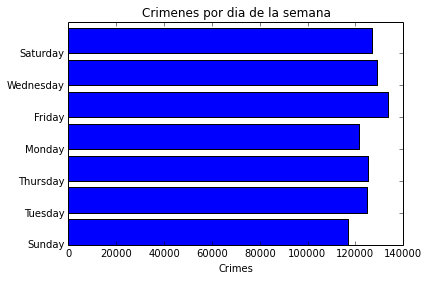

In [15]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

days = [t[0] for t in day_of_week_crimes]
y_pos = np.arange(len(days))
crimes = [t[1] for t in day_of_week_crimes]

plt.barh(y_pos, crimes)
plt.yticks(y_pos, days)
plt.xlabel('Crimes')
plt.title('Crimenes por dia de la semana')

plt.show()

## Spark SQL

In [16]:
dataframe.registerTempTable("crimes")
sqlCtx.sql("select distinct Category from crimes").collect()

[Row(Category=u'FRAUD'),
 Row(Category=u'SUICIDE'),
 Row(Category=u'SEX OFFENSES FORCIBLE'),
 Row(Category=u'LIQUOR LAWS'),
 Row(Category=u'SECONDARY CODES'),
 Row(Category=u'FAMILY OFFENSES'),
 Row(Category=u'MISSING PERSON'),
 Row(Category=u'OTHER OFFENSES'),
 Row(Category=u'DRIVING UNDER THE INFLUENCE'),
 Row(Category=u'WARRANTS'),
 Row(Category=u'ARSON'),
 Row(Category=u'SEX OFFENSES NON FORCIBLE'),
 Row(Category=u'FORGERY/COUNTERFEITING'),
 Row(Category=u'GAMBLING'),
 Row(Category=u'BRIBERY'),
 Row(Category=u'ASSAULT'),
 Row(Category=u'DRUNKENNESS'),
 Row(Category=u'EXTORTION'),
 Row(Category=u'TREA'),
 Row(Category=u'WEAPON LAWS'),
 Row(Category=u'LOITERING'),
 Row(Category=u'SUSPICIOUS OCC'),
 Row(Category=u'ROBBERY'),
 Row(Category=u'PROSTITUTION'),
 Row(Category=u'EMBEZZLEMENT'),
 Row(Category=u'BAD CHECKS'),
 Row(Category=u'DISORDERLY CONDUCT'),
 Row(Category=u'RUNAWAY'),
 Row(Category=u'RECOVERED VEHICLE'),
 Row(Category=u'VANDALISM'),
 Row(Category=u'DRUG/NARCOTIC'),
 Row(C

In [17]:
sqlCtx.sql("select distinct Category from crimes order by Category").collect()

[Row(Category=u'ARSON'),
 Row(Category=u'ASSAULT'),
 Row(Category=u'BAD CHECKS'),
 Row(Category=u'BRIBERY'),
 Row(Category=u'BURGLARY'),
 Row(Category=u'DISORDERLY CONDUCT'),
 Row(Category=u'DRIVING UNDER THE INFLUENCE'),
 Row(Category=u'DRUG/NARCOTIC'),
 Row(Category=u'DRUNKENNESS'),
 Row(Category=u'EMBEZZLEMENT'),
 Row(Category=u'EXTORTION'),
 Row(Category=u'FAMILY OFFENSES'),
 Row(Category=u'FORGERY/COUNTERFEITING'),
 Row(Category=u'FRAUD'),
 Row(Category=u'GAMBLING'),
 Row(Category=u'KIDNAPPING'),
 Row(Category=u'LARCENY/THEFT'),
 Row(Category=u'LIQUOR LAWS'),
 Row(Category=u'LOITERING'),
 Row(Category=u'MISSING PERSON'),
 Row(Category=u'NON-CRIMINAL'),
 Row(Category=u'OTHER OFFENSES'),
 Row(Category=u'PORNOGRAPHY/OBSCENE MAT'),
 Row(Category=u'PROSTITUTION'),
 Row(Category=u'RECOVERED VEHICLE'),
 Row(Category=u'ROBBERY'),
 Row(Category=u'RUNAWAY'),
 Row(Category=u'SECONDARY CODES'),
 Row(Category=u'SEX OFFENSES FORCIBLE'),
 Row(Category=u'SEX OFFENSES NON FORCIBLE'),
 Row(Category

## 10 delitos más comunes con SQL

In [21]:
sql = "select Category, count(*) as crimes_count from crimes "
sql += "group by Category order by crimes_count desc limit 10"
sqlCtx.sql(sql).collect()

[Row(Category=u'LARCENY/THEFT', crimes_count=174900),
 Row(Category=u'OTHER OFFENSES', crimes_count=126182),
 Row(Category=u'NON-CRIMINAL', crimes_count=92304),
 Row(Category=u'ASSAULT', crimes_count=76876),
 Row(Category=u'DRUG/NARCOTIC', crimes_count=53971),
 Row(Category=u'VEHICLE THEFT', crimes_count=53781),
 Row(Category=u'VANDALISM', crimes_count=44725),
 Row(Category=u'WARRANTS', crimes_count=42214),
 Row(Category=u'BURGLARY', crimes_count=36755),
 Row(Category=u'SUSPICIOUS OCC', crimes_count=31414)]

## Día de la semana con más casos de 'Driving under the influence'

In [23]:
sql = "select DayOfWeek, count(*) as crimes_count from crimes "
sql += "where Category == 'DRIVING UNDER THE INFLUENCE'"
sql += " group by DayOfWeek order by crimes_count desc limit 1"
sqlCtx.sql(sql).collect()

[Row(DayOfWeek=u'Saturday', crimes_count=457)]